## Titanic kaggle competition 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### load dataset

In [8]:
df = pd.read_csv(r"D:\datasets\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### check the dataset that it is balance dataset or not

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
DF = pd.read_csv(r"D:\datasets\titanic\test.csv")
DF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### label encoding for male = 1 and female = 0

In [11]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first= True)
DF['Sex'] = pd.get_dummies(DF['Sex'], drop_first= True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### check corelation

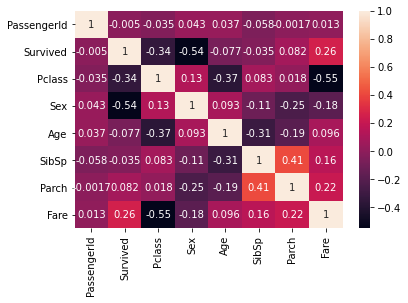

In [13]:
sns.heatmap(df.corr(), annot= True)

### plot some graphs to analyze data

#### Sex vs Survival graph

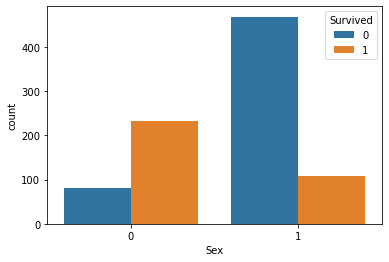

In [14]:
sns.countplot('Sex', data = df, hue = 'Survived')

#### Pclass vs Survival graph 

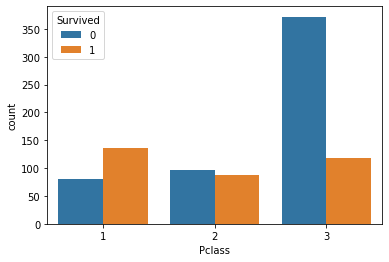

In [15]:
sns.countplot('Pclass', data = df, hue = 'Survived')

#### Analyze avg. Age according to Pclass

Avg. of p1class age 38.233440860215055


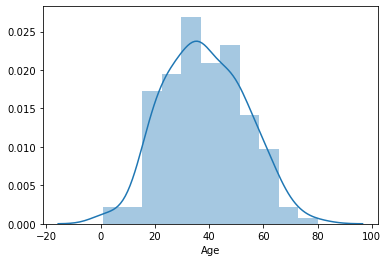

In [24]:
p1 = df.loc[df['Pclass'] == 1]
x = p1["Age"].dropna()
sns.distplot(x)
print('Avg. of p1class age', np.average(x))

#### now differentiate common age of male and female for pclass 1

In [26]:
p1_m = p1.loc[p1['Sex'] == 1]
p1_f = p1.loc[p1['Sex'] == 0]

x = p1_m['Age'].dropna()
y = p1_f['Age'].dropna()

Avg. male age 41.28138613861386


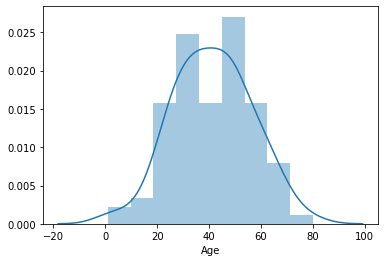

In [27]:
sns.distplot(x)
print('Avg. male age', np.average(x))

Avg. female age 34.61176470588235


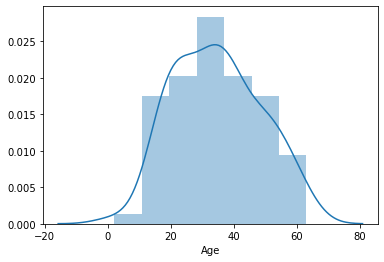

In [28]:
sns.distplot(y)
print('Avg. female age', np.average(y))

#### now differentiate between survived or not for males

In [30]:
p1_m_s = p1_m.loc[p1_m['Survived'] == 1]
X = p1_m_s['Age'].dropna()

p1_m_ns = p1_m.loc[p1_m['Survived'] == 0]
inverse_X = p1_m_ns['Age'].dropna()

In [34]:
print('Avg. survived male age for p1class', np.average(X))

Avg. survived male age for p1class 36.248000000000005


In [33]:
print('Avg. not survived male age p1class', np.average(inverse_X))

Avg. not survived male age p1class 44.58196721311475


#### same for female

In [36]:
p1_f_s = p1_f.loc[p1_f['Survived'] == 1]
Y = p1_f_s['Age'].dropna()

p1_f_ns = p1_f.loc[p1_f['Survived'] == 0]
inverse_Y = p1_f_ns['Age'].dropna()

In [37]:
print('Avg. survived female age p1class', np.average(Y))

Avg. survived female age p1class 34.9390243902439


In [38]:
print('Avg. not survived female age p1class', np.average(inverse_Y))

Avg. not survived female age p1class 25.666666666666668


#### all the same procedure for pclass 2 and 3 

Avg. of p2class age 29.87763005780347


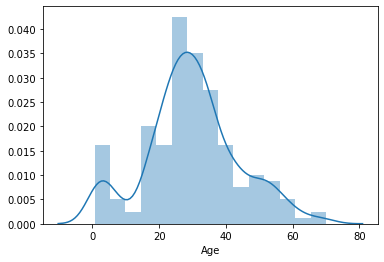

In [39]:
p2 = df.loc[df['Pclass'] == 2]
x = p2["Age"].dropna()
sns.distplot(x)
print('Avg. of p2class age', np.average(x))

In [40]:
# now differentiate common age between male and female

p2_m = p2.loc[p2['Sex'] == 1]
p2_f = p2.loc[p2['Sex'] == 0]

p2_x = p2_m['Age'].dropna()
p2_y = p2_f['Age'].dropna()

In [42]:
print('Avg. male age', np.average(p2_x))

Avg. male age 30.74070707070707


In [43]:
print('Avg. female age', np.average(p2_y))

Avg. female age 28.722972972972972


In [44]:
# now differentiate between survived or not for males

p2_m_s = p2_m.loc[p2_m['Survived'] == 1]
p2_X = p2_m_s['Age'].dropna()

p2_m_ns = p2_m.loc[p2_m['Survived'] == 0]
p2_inverse_X = p2_m_ns['Age'].dropna()

In [45]:
print('Avg. survived male age for p2 class', np.average(p2_X))

Avg. survived male age for p2 class 16.022


In [46]:
print('Avg. not survived male age p2class', np.average(p2_inverse_X))

Avg. not survived male age p2class 33.36904761904762


In [47]:
# now differentiate between survived or not for females

p2_f_s = p2_f.loc[p2_f['Survived'] == 1]
p2_Y = p2_f_s['Age'].dropna()

p2_f_ns = p2_f.loc[p2_f['Survived'] == 0]
p2_inverse_Y = p2_f_ns['Age'].dropna()

In [49]:
print('Avg. survived female age for p2class', np.average(p2_Y))

Avg. survived female age for p2class 28.080882352941178


In [50]:
print('Avg. not survived female age for p2class', np.average(p2_inverse_Y))

Avg. not survived female age for p2class 36.0


Avg. of p3class age 25.14061971830986


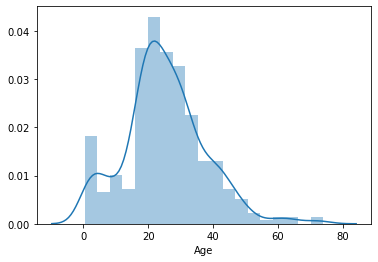

In [51]:
p3 = df.loc[df['Pclass'] == 3]
x = p3["Age"].dropna()
sns.distplot(x)
print('Avg. of p3class age', np.average(x))

In [52]:
# now differentiate common age between male and female

p3_m = p3.loc[p3['Sex'] == 1]
p3_f = p3.loc[p3['Sex'] == 0]

p3_x = p3_m['Age'].dropna()
p3_y = p3_f['Age'].dropna()

In [53]:
print('Avg. male age p3class', np.average(p3_x))

Avg. male age p3class 26.507588932806325


In [54]:
print('Avg. female age', np.average(p3_y))

Avg. female age 21.75


In [55]:
# now differentiate between survived or not for males

p3_m_s = p3_m.loc[p3_m['Survived'] == 1]
p3_X = p3_m_s['Age'].dropna()

p3_m_ns = p3_m.loc[p3_m['Survived'] == 0]
p3_inverse_X = p3_m_ns['Age'].dropna()

In [56]:
print('Avg. survived male age for p3 class', np.average(p3_X))

Avg. survived male age for p3 class 22.274210526315787


In [57]:
print('Avg. not survived male age ', np.average(p3_inverse_X))

Avg. not survived male age  27.25581395348837


In [58]:
# now differentiate between survived or not for females

p3_f_s = p3_f.loc[p3_f['Survived'] == 1]
p3_Y = p3_f_s['Age'].dropna()

p3_f_ns = p3_f.loc[p3_f['Survived'] == 0]
p3_inverse_Y = p3_f_ns['Age'].dropna()

In [59]:
print('Avg. survived female age', np.average(p3_Y))

Avg. survived female age 19.329787234042552


In [60]:
print('Avg. not survived female age p3class', np.average(p2_inverse_Y))

Avg. not survived female age p3class 36.0


In [61]:
def age_feature(col):
    Age = col[0]
    Sex = col[1]
    Survived = col[2]
    Pclass = col[3]
    
    if pd.isnull(Age):
        if Pclass == 1:
            if Sex == 1:
                if Survived == 1:
                    return 36.24
                else:
                    return 44.58
                
            elif Sex == 0:
                if Survived == 1:
                    return 34.93
                else:
                    return 25.66
                
        if Pclass == 2:
            if Sex == 1:
                if Survived == 1:
                    return 16.02
                else:
                    return 33.36
                
            elif Sex == 0:
                if Survived == 1:
                    return 28.08
                else:
                    return 36.0
                
        if Pclass == 3:
            if Sex == 1:
                if Survived == 1:
                    return 22.27
                else:
                    return 27.25
            elif Sex == 0:
                if Survived == 1:
                    return 19.32
                else:
                    return 36.0
    else:
        return Age

#### Apply function to replace null values of age column

In [62]:
df['Age'] = df[['Age', 'Sex', 'Survived' , 'Pclass']].apply(age_feature, axis=1)
DF['Age'] = df[['Age', 'Sex', 'Survived' , 'Pclass']].apply(age_feature, axis=1)

In [63]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [64]:
DF.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

#### fill Embark null value for training data

In [65]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
DF['Embarked'] = DF['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [66]:
df['Embarked'].unique()

array([ 0.,  1.,  2., nan])

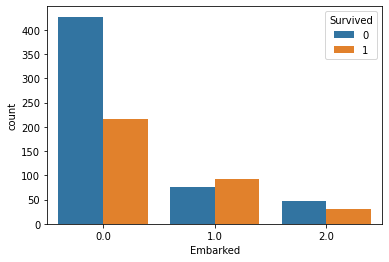

In [67]:
sns.countplot(df['Embarked'].dropna(), hue= df['Survived'])

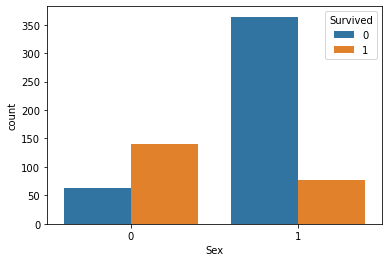

In [69]:
emb_0 = df.loc[df['Embarked'] == 0]
sns.countplot(emb_0['Sex'], hue = emb_0['Survived'])

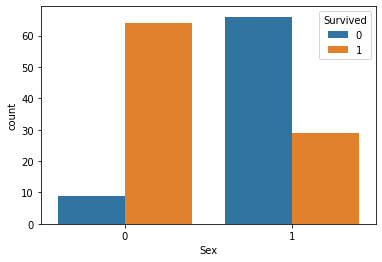

In [70]:
emb_1 = df.loc[df['Embarked'] == 1]
sns.countplot(emb_1['Sex'], hue = emb_1['Survived'])

In [71]:
a = emb_1.loc[emb_1['Sex'] == 1]
a['Survived'].value_counts()

0    66
1    29
Name: Survived, dtype: int64

In [72]:
a = emb_1.loc[emb_1['Sex'] == 0]
a['Survived'].value_counts()

1    64
0     9
Name: Survived, dtype: int64

In [73]:
df['Embarked'].fillna(value=0, inplace= True)

#### fill Cabin null value for training data and testing dataset

In [75]:
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [76]:
DF['Cabin'].fillna('U', inplace=True)
DF['Cabin'] = DF['Cabin'].apply(lambda x: x[0])
DF['Cabin'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [77]:
from sklearn.preprocessing import StandardScaler


replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

df['Cabin'] = df['Cabin'].apply(lambda x: replacement.get(x))
df['Cabin'] = StandardScaler().fit_transform(df['Cabin'].values.reshape(-1, 1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,-0.494813,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.960231,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,-0.494813,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.960231,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,-0.494813,0.0


In [78]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

DF['Cabin'] = DF['Cabin'].apply(lambda x: replacement.get(x))
DF['Cabin'] = StandardScaler().fit_transform(DF['Cabin'].values.reshape(-1, 1))
DF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,22.0,0,0,330911,7.8292,-0.478344,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,38.0,1,0,363272,7.0000,-0.478344,0
2,894,2,"Myles, Mr. Thomas Francis",1,26.0,0,0,240276,9.6875,-0.478344,2
3,895,3,"Wirz, Mr. Albert",1,35.0,0,0,315154,8.6625,-0.478344,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,35.0,1,1,3101298,12.2875,-0.478344,0


In [79]:
df['Cabin'].value_counts()

-0.494813    687
 0.960231     59
 1.930260     47
 2.900289     33
 2.415274     32
-0.009798     15
 1.445245     13
 0.475216      4
-0.979827      1
Name: Cabin, dtype: int64

#### create training and testing data

In [154]:
x = df.drop(['Name', 'Survived', 'Ticket', 'PassengerId', 'Fare','Cabin'], axis = 1)
y = df['Survived']

In [145]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,0.432793,0,0.0
1,1,0,38.0,0.432793,0,1.0
2,3,0,26.0,-0.474545,0,0.0
3,1,0,35.0,0.432793,0,0.0
4,3,1,35.0,-0.474545,0,0.0


### decision tree algorithm for predic value

In [165]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state= 46)
model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(),n_estimators= 50, learning_rate= 0.35)

model.fit(X_train,Y_train)
pred = model.predict(X_test)

print("f1 score-",f1_score(Y_test, pred))
accuracy_score(Y_test, pred)

f1 score- 0.8648648648648648


0.888268156424581

#### creat output file for decision tree

In [166]:
x = DF.drop(['Name', 'Ticket', 'PassengerId', 'Fare', 'Cabin'], axis = 1)

In [167]:
pred = model.predict(x)

#### 66.62% accuracy after submmision

In [168]:
Tdata = pd.read_csv(r"D:\datasets\titanic\test.csv")

data = {'PassengerId' : Tdata['PassengerId'],
        'Survived': pred}

odata = pd.DataFrame(data)
odata.set_index('PassengerId',inplace = True)
odata

,Survived
PassengerId,
892,1
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [169]:
odata.to_csv("TITANIC_desitiontree")

#### PCA method

In [474]:
x = df.drop(['Name', 'Survived', 'Ticket', 'PassengerId', 'Fare','Cabin'], axis = 1)
y = df['Survived']

In [475]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
X = pca.fit_transform(x)
explained_variance = np.var(X, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance_ratio)

[0.99028093 0.00635726 0.00336181]


In [476]:
np.cumsum(explained_variance_ratio)

array([0.99028093, 0.99663819, 1.        ])

In [477]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(),n_estimators= 50, learning_rate= 0.4)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(f1_score(Y_test, pred))
accuracy_score(Y_test, pred)

0.6829268292682927


0.7821229050279329

#### create output file for PCA

In [484]:
X = DF.drop(['Name', 'Ticket', 'PassengerId', 'Fare', 'Cabin'], axis = 1)
pca = PCA(n_components= 3)
X = pca.fit_transform(X)
pred = model.predict(X)

Tdata = pd.read_csv(r"D:\datasets\titanic\test.csv")

data = {'PassengerId' : Tdata['PassengerId'],
        'Survived': pred}

odata = pd.DataFrame(data)
odata.set_index('PassengerId',inplace = True)
odata

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [485]:
odata.to_csv("TITANIC_PCA")

#### 61% accuracy after submmision for PCA

#### loop for max f1_score for decision tree

In [412]:
J = []
acc = [0]
j = 0

for i in range(1, 100):
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = j)
    model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=8),n_estimators= 50, learning_rate= 0.35)
    
    model.fit(x_train, y_train)
    pred = model.predict(x_test)  
    accuracy = f1_score(y_test, pred)
    print(f1_score(y_test, pred))
    
    if accuracy >= max(acc):
        J.append(j)
        acc.append(accuracy)

    j+= 1

0.863013698630137
0.8275862068965518
0.8450704225352113
0.8611111111111112
0.8472222222222223
0.8666666666666667
0.8435374149659863
0.8472222222222223
0.8767123287671234
0.8251748251748251
0.8590604026845637
0.8356164383561644
0.863013698630137
0.8513513513513513
0.8055555555555556
0.8513513513513513
0.8611111111111112
0.8413793103448276
0.8513513513513513
0.8356164383561644
0.8450704225352113
0.8551724137931035
0.8472222222222223
0.8513513513513513
0.8450704225352113
0.8493150684931506
0.8689655172413793
0.8531468531468531
0.8749999999999999
0.87248322147651
0.863013698630137
0.8767123287671234
0.8611111111111112
0.8378378378378378
0.8689655172413793
0.8666666666666667
0.8590604026845637
0.8513513513513513
0.8707482993197277
0.88
0.8194444444444444
0.8611111111111112
0.8513513513513513
0.8413793103448276
0.863013698630137
0.8671328671328671
0.8551724137931035
0.8843537414965987
0.8551724137931035
0.8378378378378378
0.863013698630137
0.8707482993197277
0.8571428571428572
0.861111111111

In [414]:
print(acc)

[0, 0.863013698630137, 0.8666666666666667, 0.8767123287671234, 0.8767123287671234, 0.88, 0.8843537414965987, 0.8918918918918919]


In [413]:
J

[0, 5, 8, 31, 39, 47, 63]

#### max f1 score is for random state = 74 your might be different

In [445]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 63)
model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=8),n_estimators= 50, learning_rate= 0.35)
model.fit(X_train,Y_train)
pred = model.predict(X_test)


#### after submission 69% accuracy

#### ANN deep learning

In [486]:
x = df.drop(['Name', 'Survived', 'Ticket', 'PassengerId', 'Fare', 'Cabin'], axis = 1)
y = df['Survived']

In [487]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [488]:
x_train.shape

(712, 6)

In [489]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.sigmoid))

model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [493]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8427
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8567
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8596
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8483
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8399
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8272
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8469
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8539
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8497
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8483
Epoch 11/50
23/23 [

In [494]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_acc, val_loss)

6/6 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8380
0.8379888534545898 0.4220348000526428


In [103]:
X = DF.drop(['Name', 'Ticket', 'PassengerId', 'Fare', 'Cabin'], axis = 1)

In [ ]:
pred = model.predict(X)

#### create prediction dataset for ANN 

In [108]:
import numpy as np

k = []

for i in range(0,418):
    j = np.argmax(pred[i])
    k.append(j)

In [109]:
k

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [110]:
Tdata = pd.read_csv(r"D:\datasets\titanic\test.csv")

data = {'PassengerId' : Tdata['PassengerId'],
        'Survived': k}

odata = pd.DataFrame(data)
odata.set_index('PassengerId',inplace = True)
odata

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [320]:
odata.to_csv("TITANIC_ANN")

#### 75% accuracy after submmision for ANN